# 1. 차원축소(Dimension Reduction)란?

## 1) 차원의 저주

차원축소는 매우 많은 피쳐로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것이다.  
일반적으로 데이터의 차원이 커질수록, 즉 피쳐가 많이 파생될 경우 데이터 포인트 간의 거리가 기하급수적으로 멀어지고 sparse한 구조를 가지게 된다. 한정된 데이터에서 차원이 수없이 커진다면 타겟값에 대한 예측 정확도가 상대적으로 떨어지게 될 수 밖에 없다. 피쳐가 많을 경우 개별 피쳐간에 상관관계가 높게 나와 피쳐들의 영향력이 줄어들게 되고, 이는 곧 모델의 예측 성능 저하로 이어진다. 선형회귀에서도 입력 변 간의 상관관계가 높을 경우 다중 공산성 문제로 모델의 예측 성능이 저하된다.  

따라서 우리는 sparse한 데이터 구조로 인한 모델의 성능 저하를 완화하기 위해 __`차원축소`__ 를 사용한다.  

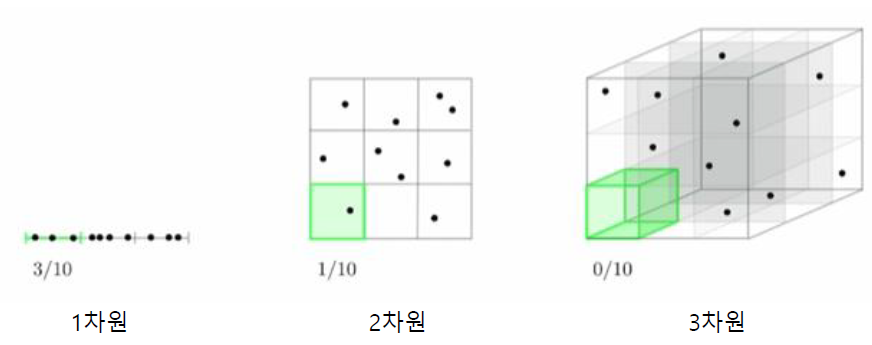

위의 그림을 보자. 1차원에서는 하나의 칸에 3개의 관측치가 들어가있다. 2차원에서는 한칸에 1개의 관측치가 들어가 있는 것을 알 수 있고, 3차원에서는 한 칸에 1개 존재하거나 그렇지 않은 칸도 존재한다. 차원이 늘어나면서 관측치의 수가 10개라고 한다면, 상대적으로 데이터의 수가 굉장히 희소해지는 sparse 현상이 발생함을 그림으로 할 수 있다. 우리는 이를 __`차원의 저주`__ 라고 한다.  

데이터의 양을 $n$ , feature의 수를 $p$라고 하자.  

$n$ > $p$ 인 경우 통계적으로 얘기할 때도 데이터의 양이 많을 때 데이터의 불확실성을 줄이기 때문에 보다 정확한 관측을 할 수 있지만,  
$n$ < $p$ 인 경우 상대적으로 데이터가 적어지기 때문에 편향은 줄어들지만 다양성이 증가하여 모형이 복잡해지고 이는 곧 과적합을 야기할 수 있다.  

따라서 데이터의 양이 고정되더라도, 데이터의 양에 비해 차원이 커진다면 복잡도가 높아지기 때문에 이왕이면 적은 차원을 선호하는 경향이 있다.


차원의 저주를 해결하기 위해 빈 공간을 채우기 위해서 밀도가 높아질 때까지 데이터를 추가하는 방법이 있다. 하지만, 데이터셋 자체가 너무 고차원이면 필요 데이터수를 만족할 수가 없다. 따라서 차원 축소를 통해 필요 데이터 수를 줄이고 Feature의 수를 줄인다.

## 2) 차원축소란?

### 1] 투영(Projection)

일반적으로 대부분의 실제 데이터셋에서는 모든 데이터의 특성, 즉 차원이 고르게 분포되어 있지 않다. 필기체 숫자 데이터셋인 MNIST를 예로들면, 어떤 특성(각 pixel을 하나의 특성으로 볼 때)은 거의 변화가 없고, 또 어떤 특성은 다른 특성들과 서로 연관되어 있다. 

이렇듯 학습 데이터셋은 고차원 공간에서 저차원 __부분 공간(subspace)__에 위치하게 된다. 즉, 고차원의 데이터의 특성 중 일부 특성으로 데이터를 표현할 수 있다는 말이 된다.  

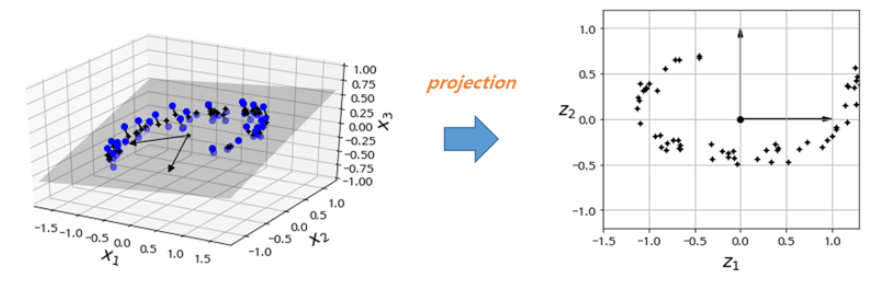

### 2] 매니폴드

일반적으로 우리는 머신러닝 모델을 만들 때 __`매니폴드`__ 가정을 하고 데이터를 살펴본다.  

매니폴드란 학습이 되어있지 않은 상태에서 데이터를 이용해 모델을 학습해 나간다는것으로, 매니폴드 학습을 하게 되면 학습된 모델의 기저 벡터는 우리가 생각하는 차원과 다를 수 있으며, 우리의 n차원 공간이 아니라 실제로는 n차원보다 적은 부분 공간에 놓여있을 것이다. 고차원 데이터의 각 값들이 이리저리 흩어져 있을텐데 그 값들을 에러 없이 잘 아우를 수 있는 subspace가 있을 것이라고 생각하여 그 공간을 찾는 것이다. 그리고 그렇게 찾은 공간을 활용하여 데이터 차원을 축소시킬 수 있는 것으로 기대하는 것이다. 결론적으로 데이터를 압축하고 차원의 저주 문제를 해결하기 위해 매니폴드 러닝을 사용한다.  

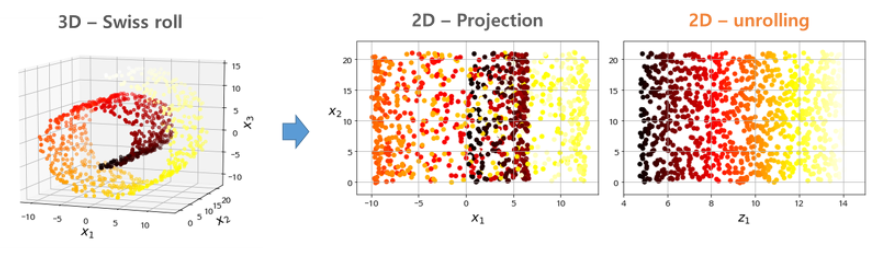  

위의 그림은 스위스 롤 데이터 셋이며 2D-매니폴드의 한 예이다. 그림에서 볼 수 있듯이, 2D-매니폴드는 고차원(3차원) 공간에서 휘거나 말린 2D 모양이다. 일반적으로 $d$-차원 매니폴드는 국소적으로 $d$-차원 초평면으로 볼 수 있는 $n$-차원 공간의 일부이다($d$ < $n$). 스위스 롤은 $d$ = 2이고 $n$ = 3인, 국소적으로는 2D 평면이지만 3차원으로 말려있는 데이터이다.

일반적으로 차원 축소는 `피쳐 선택(feature Selection)`, `피쳐 추출(feature extraction)`이 있다.  

* `피쳐 선택(feature selection)`: 특정 피쳐에 종속성이 강한 불필요한 피쳐는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피쳐만 선택하는 것  


* `피쳐 추출(feature extraction)` : 기존 피쳐를 저차원의 중요 피쳐로 압축해서 추출하는 것. 새롭게 추출된 중요 특성은 기존 피쳐가 압축된 것으로 기존 피쳐와는 완전 다른 값을 가짐  

이처럼 차원 축소는 단순히 데이터의 압축을 의미하는 것이 아니다. 차원축소의 목적은 Data compression이다. 데이터를 압축하는 것인데 고차원의 데이터를 저차원으로 변환하여 압축하는 것으로 가장 초기 단계의 데이터 압축 기법이라고 생각할 수 있다. 이 이후에 다양한 방법들의 가장 베이스로 깔리는 것이기 때문에 PCA는 중요하다고 말할 수 있다.

### 3] 차원축소의 장점 & 단점

__< 차원축소의 장점 >__  

고차원의 데이터는 시작적으로 표현하기 어려운데 2차원 평면에서 시각화를 통해 데이터 포인트 간의 관계, 기존 feature 와의 관계를 시각적으로 파악하기 위해 차원축소가 유용하다. 텍스트 데이터 분석을 할 때 워므 임베딩을 하는데 이 임베딩 한 차원을 시각화하기 위해서 저차원 공간으로 projection하여 나타내는 방법도 있다. 이는 추후 공부해보겠다.  

feature들의 감소로 인해 메모리/디스크 저장 공간이 감소될 것이고 이에 따라 자연스럽게 머신러닝 알고리즘의 속도가 증가한다.  

__< 차원축소의 단점 >__  

차원축소의 단점은 데이터를 압축하다 보니 일부 정보의 손실이 있을 수 있고, 100차원의 데이터를 10차원으로 줄인다면 데이터가 함축적으로 바뀌기 때문에 데이터를 해석하는데 어려움이 있다.

차원 축소는 매우 많은 픽셀로 이루어진 이미지 데이터에서 잠재된 특성을 피쳐로 도출해 함축적 형태의 이미지 변환과 압축을 수행할 수 있다. 즉, 딥러닝에서 되게 유용하게 사용된다.  

이렇게 변환된 이미지는 원본 이미지보다 훨씬 적은 차원이기 때문에 이미지 분류 등의 분류 수행 시에 과적합(overfitting) 영향력이 작아져서 오히려 원본 데이터로 예측하는 것 보다 예측성능을 더 높일 수 있다.  

차원 축소가 자주 사용되는 곳은 이외에도 텍스트 분석 등이 있다.

# 2. PCA(Principal Component Analysis)

## 1) PCA

__`PCA`__ 는 가장 대표적인 차원 축소 기법이다. PCA는 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 __주성분(Principal Component)__을 추출해 차원을 축소하는 기법이다.  

PCA로 차원을 축소할 때는 기존 데이터의 정보 유실이 최소화되는 것이 당연하다. 이를 위해 PCA를 진행하면서 기존 데이터의 분산을 최대한 유지하는 방면으로 PCA를 진행해야 한다. 

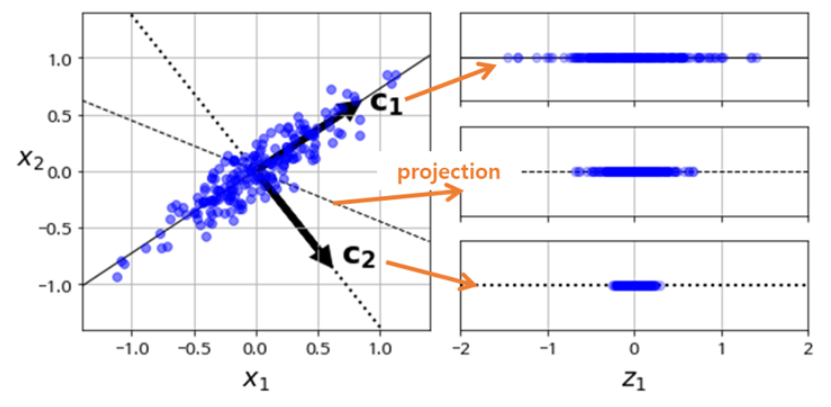

2차원 데이터에서 위의 그림과 같은 데이터들이 존재한다고 가정해보겠다. 우리는 이걸 1차원으로 축소하고 싶다고 생각하면 어떤 축을 기준으로 데이터를 설명할 것인지 살표보자. 각각의 축을 기준으로 데이터 포인트를 정사영(projection) 내려보면, 각 데이터 포인트들은 좌표값을 만들고, 그 좌표값을 살펴보면 그 축 위에 데이터들이 존재함을 알 수 있다. 우리는 기존 데이터가 가지고 있는 정보를 잃지 않기 위해 최대한 해당 축을 기준으로 데이터의 분포가 퍼져있으면 좋다(분산이 큰게 좋다). 즉, $c_1$축을 기준으로 정사영 내린 1차원 데이터가 차원축소를 하고 난 후 상대적으로 유용한 데이터가 된다.  

데이터가 가진 정보라는 것은 그들을 구분할 수 있는 뭔가가 있다는 의미인데, 분산이 작다면 데이터간의 변별력이 낮아지기 때문에 분산이 큰 $c_1$을 선택하는 것이 좋다. 나머지는 다 비슷한 데이터가 만들어진다고 생각할 수 있다.  

따라서 PCA는 차원을 축소하였을 때 분산이 최대화되는 축을 선택하여 차원축소를 진행하고 이는 정보가 가장 적게 손실되므로 합리적이라고 볼 수 있다. 위의 그림에서는 $z_1$ 의 가장 위의 축을 선택하는 것이 합리적이다.  

PCA, 즉 주성분 분석은 이처럼 원본 데이터의 피쳐 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법이다.

## 2) 선형대수학적 관점에서의 PCA

PCA를 선형대수학 관점에서 해석해 보면, 입력 데이터의 공분산 행렬(Covariance Matrix)을 고유값 분해하고, 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것이다. 이 고유벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타낸다. 고윳값(eigenvalue)은 이 고유벡터의 크기를 나타내며, 동시에 입력 데이터의 분산을 나타낸다.  

일반적으로 성현 변환은 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것을 의미한다. 이를 특정 벡터를 하나의 공간엥서 다른 공간으로 투영하는 개념으로 볼 수 있으며, 이 경우 이 행렬을 바로 공간으로 가정하는 것이다.  

보통 분산은 한 개의 특정한 변수의 데이터 변동을 의미하나, 공분산은 두 변수 간의 변동을 의미한다. 즉, 사람 키 변수를 X, 몸무게 변수를 Y라고 하면 공분산 $Cov(X, Y) > 0$ 은 X(키)가 증가할 때 Y도 증가한다는 것을 의미한다. 공분산 행렬은 여러 변수와 관련된 공분산을 포함하는 정방형 행렬이다.  

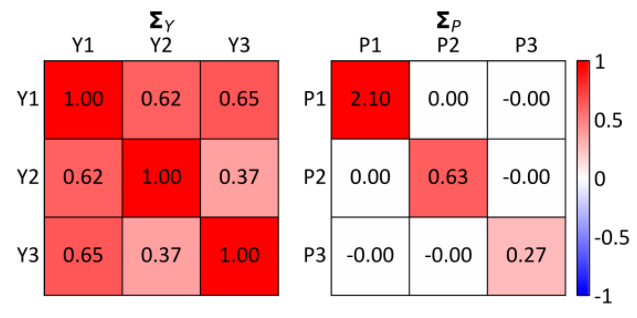  

왼쪽은 원본 데이터이고, 오른쪽은 PCA를 적용한 데이터의 공분산 행렬이다.  

공분산 행렬은 정방행렬(Diagonal Matrix)이며 대칭행렬(Symmetric Matrix)이다.  
공분산 행렬은 개별 분산값을 대각 원소로 하는 대칭행렬이다. 이 대칭행렬은 고유값 분해와 관련해 매우 좋은 특성이 있다. 대칭행렬은 항상 고유벡터를 직교행렬(orthogonal Matrix)로, 고유값을 정방 행렬로 대각화할 수 있다.  

입력 데이터의 공분산 행렬을 $C$라고 한다면, 공분산 행렬의 특성으로 인해 다음과 같이 분해할 수 있다.  

$$ C = P\sum{P^T}$$  

$P$는 $n$ x $n$의 직교행렬이며, $\sum$은 $n$ x $n$ 정방행렬, $P^T$는 행렬 $P$의 전치행렬이다.  

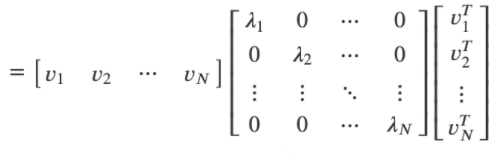

공분산 행렬 $C$는 고유벡터 직교 행렬 * 고유값 정방 행렬 * 고유벡터 직교 행렬의 전치 행렬로 분해된다.  

$v_1$은 i번째 고유벡터를, $\lambda_i$는 i번째 고유벡터의 크기를 의미한다. $v_1$는 가장 분산이 큰 방향을 가진 고유벡터이며, $v_2$는 $v_1$에 수직이며 다음으로 가장 분산이 큰 방향을 가진 고유벡터이다.  

PCA의 스텝은 다음과 같이 수행된다.  

1. 입력 데이터 세트의 공분산 행렬을 생성한다.  

2. 공분산 행렬의 고유벡터와 고유값을 계산한다.  

3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터를 추출한다.  

4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.

## 3) PCA 실습

In [14]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


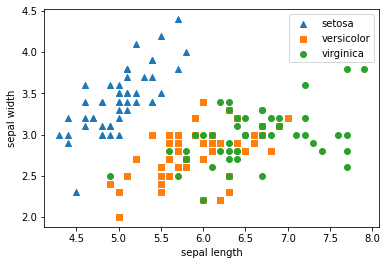

In [15]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

PCA를 통해 2차원으로 나타내보자.  

PCA 하기 전에 스케일링을 해야한다. PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받는다. 따라서 여러 속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환하는 것이 필요하다.

In [16]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF)

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [18]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0


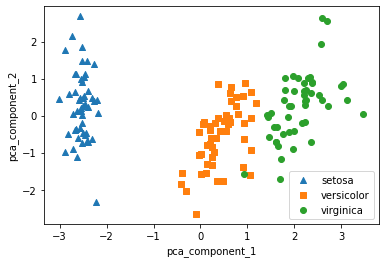

In [19]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

어느정도 PCA를 진행하고도 세가지 품목에 대한 분류가 잘 이루어졌다.  
PCA의 첫번째 새로운 축인 `pca_compontnent_1`이 원본 데이터의 변동성을 잘 반영하였기 때문이다.

In [20]:
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


첫 번째 PCA 변환 요소인 `pca_component_1`이 전체 변동성의 약 76.7%를 차지하며, 두번째가 약 18.3%를 차지한다. 따라서 PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명할 수 있다.

In [21]:
# PCA 변환 전 rf 적용
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print(scores)
print('평균 정확도 :',np.mean(scores))

[0.98 0.94 0.96]
평균 정확도 : 0.96


In [22]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print(scores_pca)

[0.98 0.98 1.  ]


## 4) 신용카드 고객 데이터 적용

In [24]:
import pandas as pd

df = pd.read_excel('data_set/credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [25]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

<AxesSubplot:>

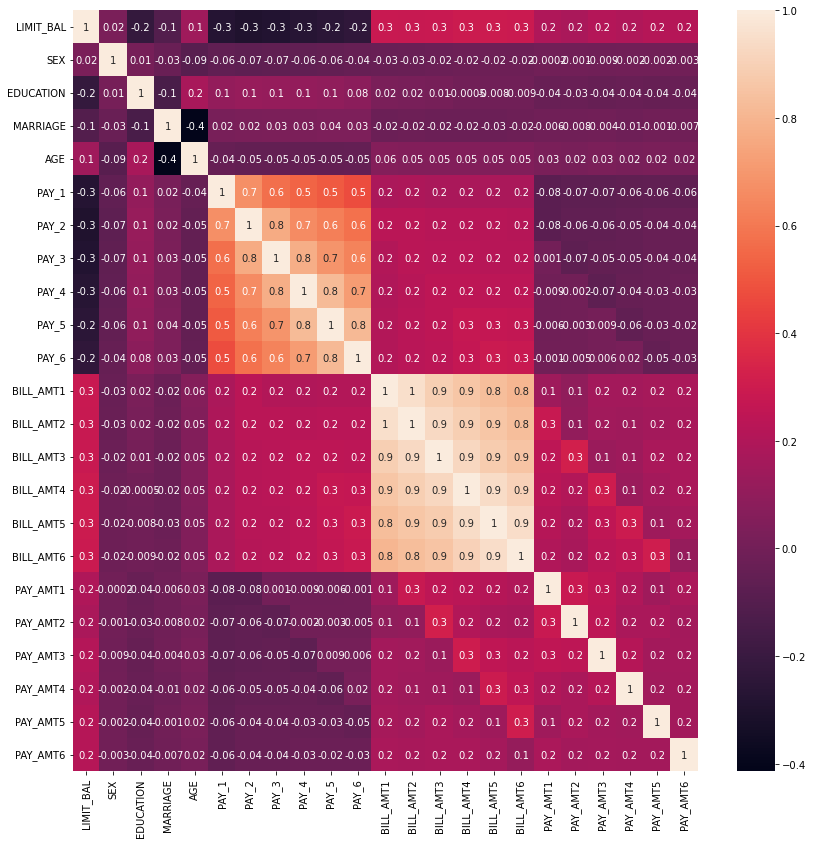

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled) 

print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


2개의 PCA 컴포넌트만으로도 6개의 속성의 변동성을 약 95% 이상 설명할 수 있다. 이는 곧 해당 6개 피쳐의 상관도가 매우 높음을 알 수 있다.

In [29]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7931 0.7978 0.8041]
PCA 변환 데이터 셋 평균 정확도:0.7983


# 2. LDA(Linear Discriminant Analysis)

__`LDA(Linear Discriminant Analysis)`__ 는 선형 판별 분석법으로 불리며, PCA와 매우 유사하다. PCA의 투영을 통한 데이터 압축하는 기법과 비슷하지만, 중요한 차이는 LDA는 지도학습의 분류(Classifier)에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소한다.  

PCA는 입력 데이터의 변동성의 가장 큰 축을 찾았지만, LDA는 입력 데이터의 결정 값 클래스를 최대한 분리할 수 있는 축을 찾는것이 차이점이다.  

`LDA`는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산(between-class-scatter)과 클래스 내부 분산(within-class-scatter)의 비율을 최대화하는 방식으로 차원을 축소한다.  
즉, 클래스 간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 빙식이다.  

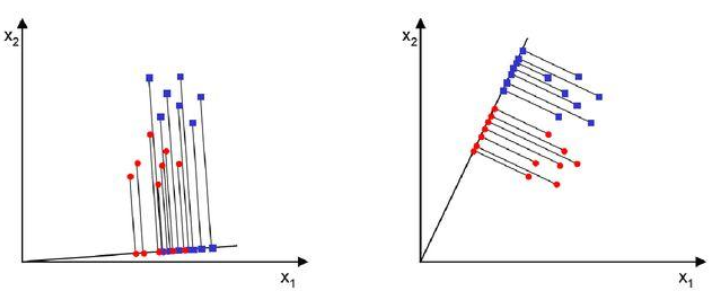

다음 그림을 보자.  

파란색 점과 빨간색 점을 서로 분류한다고 했을 때 왼쪽 축과 오른쪽 축 가운데 어떤것이 더 분류를 잘 했다고 할 수 있을까? 왼쪽의 데이터들은 축으로 사영(projection) 했을 때 빨간색과 파란색이 서로 겹치는 부분이 많다. 반면, 오른쪽 데이터들은 축으로 사영했을 때 겹치는 부분이 적다. 따라서 오른쪽이 분류를 더 잘했다고 할 수 있다.  

`LDA`는 오른쪽과 같이 분류를 해주는 기법이다. projection 후 두 클래스 간 분산은 최대로 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식이다. 클래스 간 분산이 최대가 된다는 것은 각 클래스의 중심(평균)이 서로 멀어지도록 최대한 겹치지 않게 분류하는 것이고, 클래스 내부의 분산을 최대한 작게 가져간다는 것은 최적의 분류를 위해 데이터 분산을 줄이는 것을 의미한다.  

일반적으로 LDA를 구하는 스탭은 PCA와 유사하나, 가장 큰 차이점은 공분산 행렬이 아니라 앞서 설명한 클래스 간 분산과 클래스 내부 분산 행렬을 생성한 뒤, 이 행렬에 기반해 고유벡터를 구하고 입력 데이터를 사영한다는 것이다.  

1. 클래스 내부와 클래스 간 분산 행렬을 구한다. 이 두 개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피쳐의 평균 벡터(mean vector)를 기반으로 구한다.  


2. 클래스 내부 분산을 행렬 $S_w$, 클래스 간 분산 행렬을 $S_B$라고 하면 다음 식으로 두 행렬을 고유벡터로 분해할 수 있다.  
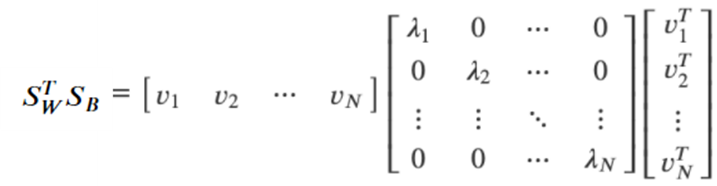  

3. 고유값이 가장 큰 순으로 K개(LDA변환 차수만큼) 추출한다.  


4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.  

LDA는 사영 후 데이터셋 분리가 잘 되지만, 정보 손설이 크고 label이 필요하다는 단점이 존재한다.

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [32]:
# LDA 적용
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


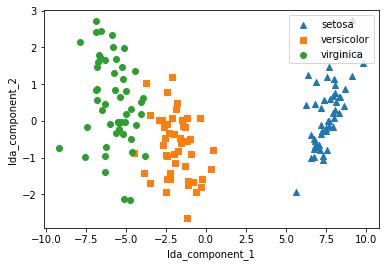

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

# 3. SVD(Singular Value Decomposition)

__`SVD(singular valud decomposition)`__ 역시 PCA와 유사한 행렬 분해 기법을 이용한다. `PCA`의 경우 정방행렬만을 고유벡터로 분해할 수 있지만, `SVD`는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있다. 일반적으로 SVD는 $m$ x $n$ 크기의 행렬 A를 다음과 같이 분해하는 것을 의미한다.  

$$ A = U\sum{V^T}$$  

SVD는 특이값 분해로 불리며, 행렬 $U$와 $V$에 속한 벡터는 특이벡터(singular vector)이며, 모든 특이벡터는 서로 직교하는 성질을 가진다.  
$\sum$은 대각행렬이며, 0이 아닌 값이 행렬 $A$의 특이값이다.  

$A$  차원이 $m$ x $n$일때  
* $U$의 차원 :  $m$ x $m$  


* $\sum$의 차원 : $m$ x $n$  


* $V^T$의 차원 :  $n$ x $n$  

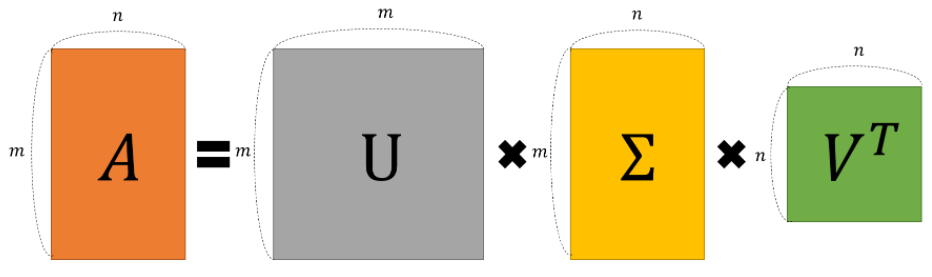

일반적으로 다음과 같이 $\sum$의 비대각인 부분과 대각원소 중에 특이값이 0인 부분도 모두 제거하고 제거된 $\sum$에 대응되는 $U$와 $V$원소도 함께 제거해 차원을 줄인 형태로 SVD를 적용한다.  

컴팩트한 형태로 SVD를 적용한 경우  

$A$ 차원이 $m$ x $n$ 일때  

* $U$의 차원 :  $m$ x $p$  


* $\sum$의 차원 : $p$ x $p$  


* $V^T$의 차원 :  $p$ x $n$  

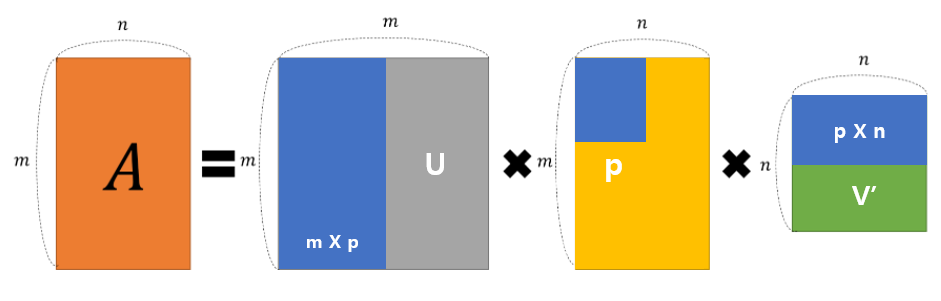

## 1) SVD 실습

In [34]:
# numpy의 svd 모듈 import
import numpy as np
from numpy.linalg import svd

# 4X4 Random 행렬 a 생성 
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [35]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [36]:
# Sima를 다시 0 을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma) 
a_ = np.dot(np.dot(U, Sigma_mat), Vt) # 0을 포함한 대칭행렬로 변환 후 내적
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


데이터 세트가 로우 간 의존성이 있을 경우 어떻게 $Sigma$값이 변하고, 이에 따른 차원축소가 진행될 수 있는지 알아보자.

In [37]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [38]:
# 다시 SVD를 수행하여 Sigma 값 확인 
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


선형 독립인 로우 벡터의 개수가 2개라는 의미이다. 즉, rank = 2

In [39]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


## 2) Truncated SVD

`Truncated SVD`는 $\sum$ 행렬에 있는 대각원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식이다.  

이렇게 분해하면 인위적으로 더 작은 차원의 $U, \sum, V^T$로 분해하기 때문에 원본 행렬을 정확하게 다시 원복할 수는 없다.  

하지만 데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬을 근사할 수 있다. 물론 원래 차원의 차수에 가깝게 잘라낼수록(Truncated) 원본 행렬에 더 가깝게 복원할 수 있다.

In [48]:
import numpy as np
from scipy.sparse.linalg import svds # Import Truncated SVD 
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인 
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)
print('\n----------------------------------------------------------------------------------')

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행. 
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

----------------------------------------------------------------------------------

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697

## 3) 사이킷런 Truncated SVD 클래스를 이용한 변환

Text(0, 0.5, 'TruncatedSVD Component 2')

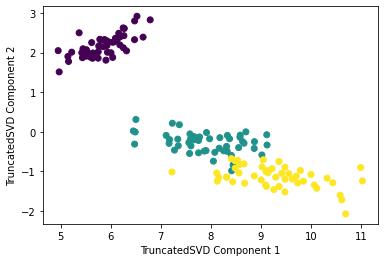

In [49]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Truncated SVD도 어느정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가지고 있음을 알 수 있다.

Text(0.5, 1.0, 'PCA Transformed')

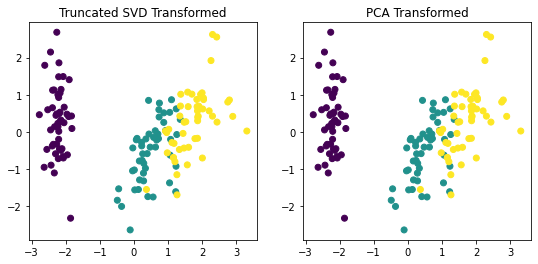

In [50]:
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현 
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

TruncatedSVD와 PCA 클래스 모두 SVD를 이용해 행렬을 분해한다.  

두 개의 변환 행렬 값과 원복 속성별 컴포넌트 비율값을 실제로 서로 비교해보면 거의 같음을 알 수 있다.  



데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행한다. 이는 PCA가 SVD 알고리즘으로 구현됨을 의미한다. 하지만 PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하며 SVD는 희소 행렬(sparse Matrix)에 대한 변환도 가능하다.

# 4. NMF(Non-Negative Matrix Factorization)

`NMF`는 TruncatedSVD와 같이 낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형이다.  

NMF는 원본 행렬 내의 모든 원소 값이 모두 양수라는 게 보장되면 다음과 같이 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭한다.  

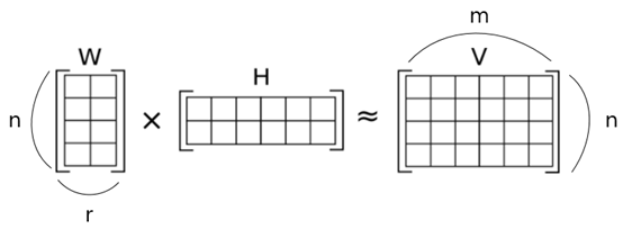

$m$ x $n$ 원본 행렬 $V$는 $n$ x $r$ 행렬 $W$와 $r$ x $m$ 행렬 $H$로 근사해 분해된다.  

행렬분해는 일반적으로 SVD와 같은 행렬 분해 기법을 통칭하는 것이다. 이렇게 분해된 행렬은 잠재 요소를 특성으로 가지게 된다. 분해 행렬 $W$는 원본 행에 대해서 이 잠재요소의 값이 얼마나 되는지에 대응하며, 분해 행렬 $H$는 이 잠재요소가 원본 열(원본 속성)로 어떻게 구성됐는지를 나타내는 행렬이다.

C:\Users\jinho\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Text(0, 0.5, 'NMF Component 2')

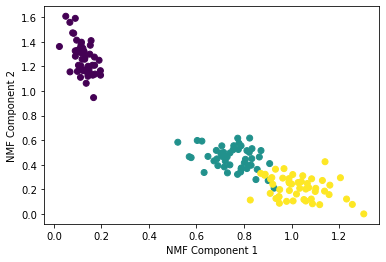

In [51]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

## NMF의 유용성

NMF가 유용한 이유 중 하나는 추출하게 되는 feature들이 모두 non-negative feature이기 때문이다.

우리가 다루게 되는 데이터들 중 어떤 데이터들은 음수 값이 포함되지 않는 데이터들이 있다.

예를 들어 그림의 경우 모든 데이터들은 pixel의 세기로 구성되어 있고, 이 값들 중 음수는 없을 것이다.

그렇다면 가령 이 데이터가 어떤 feature들이 적절히 배치된 것이라고 한다면,

가령, 얼굴의 눈, 코, 입, 귀 등의 그림이 적절히 합쳐진 것이라고 하면 이 feature들은 모두 음수가 아닌 값들로 구성되어 있다고 보는 것이 자연스럽다.

그런데, 많은 경우에 사용되는 matrix factorization 방법들(가령, SVD)이나 차원 감소 방법(요인 분석, 주성분 분석, cluster 분석 등)에서는 획득할 수 있는 feature들이 음수이면 안된다던지 하는 제한사항같은 것은 없기 때문에 데이터의 특성인 non-negativity를 보존할 수 있다는 보장을 받을 수 없다는 한계점이 있다.

또, NMF를 사용하면 좋은 이유 중 하나는 NMF는 PCA나 SVD와 같은 factorization 방법에 비해서 데이터 구조를 조금 더 잘 반영할 수 있기 때문이다.

PCA나 SVD는 feature들 간의 직교성이 보장된다. 알고리즘 자체가 그렇게 설계된 것이기 때문이다.